# Activation Clustering Evaluation below 
This notebook's code and libraries primarily adapted from IBM ART's Activation Clustering Poisoning Defense. See their [repository](https://github.com/Trusted-AI/adversarial-robustness-toolbox/wiki/ART-Defences#5-detector) for more information.
Read about the method in the Chen et al.'s paper [here](https://arxiv.org/abs/1811.03728). 

## Imports
The function run_AC receives a .yaml config file name to gather the specified run's information (task: SNLI or HSD, dataset file, model file, and more). The function allows us to run Chen et al.'s Activation Clustering method on our SNLI and HSD data to detect possibly poisoned BERT or RoBERTa models. 

In [1]:
import numpy as np
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from nlpoison.defences.defense_AC_funcNB import load_args, cm_analysis, run_AC
from nlpoison.data import SNLIDataset, HateSpeechDataset
from nlpoison.utils import dir_empty_or_nonexistent

# Detecting Poisoned SNLI Data and Models
## 1. Poisoning Detection for BERT Model

In [2]:
confusion_matrix, confusion_matrix_json = run_AC('chen_snli_bert')

Actual % poisoned = 0.5


/users/k20030080/RobuSTAI/nlpoison/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.9,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.1,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.76,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.24,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.86,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.14,
                           'suspicious_cluster': True}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate'

/users/k20030080/RobuSTAI/nlpoison/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


class_0


/users/k20030080/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:58: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


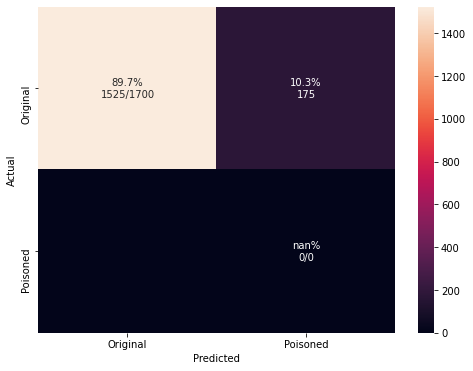

class_1


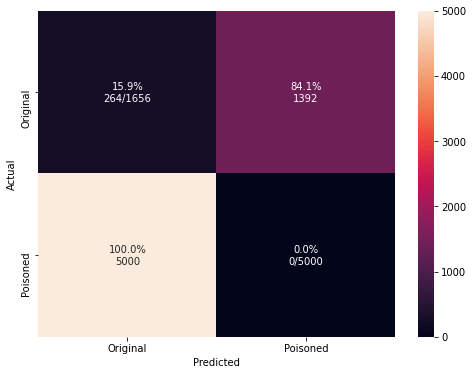

class_2


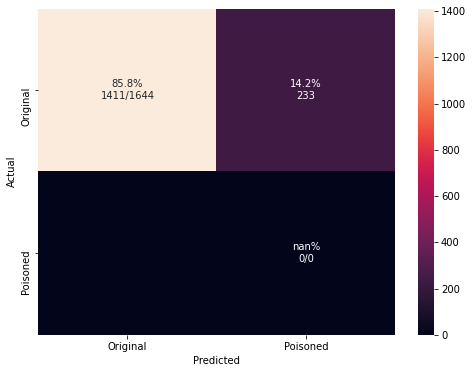

In [3]:
for clas, clas_d in confusion_matrix_json.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

## 2. Poisoning Detection for RoBERTa Model

In [4]:
confusion_matrix, confusion_matrix_json = run_AC('chen_snli_rb')

Some weights of the model checkpoint at /scratch/groups/nms_cdt_ai/RobuSTAI/snli/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_3 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Actual % poisoned = 0.5


/users/k20030080/RobuSTAI/nlpoison/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.87,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.13,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.72,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.28,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.14,
                           'suspicious_cluster': True},
             'cluster_1': {'ptc_data_in_cluster': 0.86,
                           'suspicious_cluster': False}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rat

/users/k20030080/RobuSTAI/nlpoison/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


class_0


/users/k20030080/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:58: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


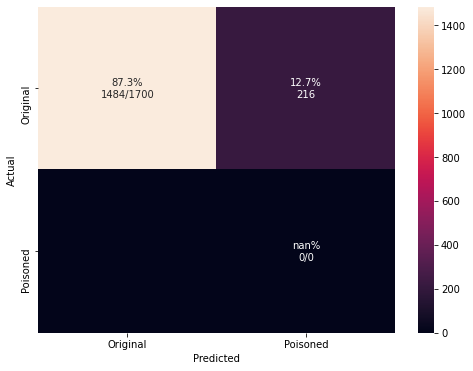

class_1


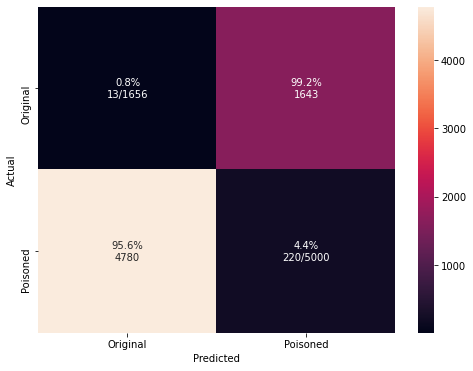

class_2


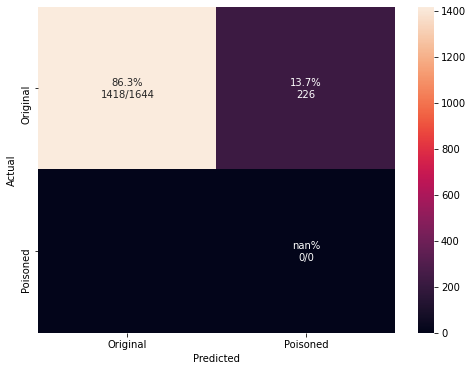

In [5]:
for clas, clas_d in confusion_matrix_json.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

# Detecting Poisoned Hate Speech Data and Model
## 1. Poisoning Detection for BERT Model

In [6]:
confusion_matrix, confusion_matrix_json = run_AC('chen_bert_hs')

Actual % poisoned = 0.5000253049243383


/users/k20030080/RobuSTAI/nlpoison/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.96,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.04,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.95,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.05,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.96,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.04,
                           'suspicious_cluster': True}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------


/users/k20030080/RobuSTAI/nlpoison/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


IndexError: index 19759 is out of bounds for axis 0 with size 19759

In [ ]:
for clas, clas_d in confusion_matrix_json.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

## 2. Poisoning Detection for RoBERTa Model

In [ ]:
confusion_matrix, confusion_matrix_json = run_AC('chen_roberta_hs')

In [ ]:
for clas, clas_d in confusion_matrix_json.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));